# 🎮 Video Game Sales Analysis
## 📊 Project Overview
This project explores global video game sales data, focusing on trends in regional popularity, genre success, and publisher performance. Using data visualization and exploratory data analysis techniques, we aim to answer questions like:

- Which platforms and genres dominate global markets?
- How do sales trends vary over time?
- Which publishers consistently release top-selling titles?

The insights help understand market behavior and can guide developers, publishers, and investors in strategic decision-making.

## 🧰 Tools Used
- Python (Pandas, Matplotlib, Seaborn)
- Jupyter Notebook
- Git & GitHub (for version control and portfolio presentation)

## ⚙️ How to Run
Place the **vgsales.csv** file in the **data/** folder.

Open **notebook/video_game_analysis.ipynb** with Jupyter Notebook.

Load the necessary libraries **(pandas, matplotlib, seaborn)**.

Follow the analysis process by running the cells in order.

If you want, you can export the data to **Power BI** and create an interactive visualization.

## 📈 Takeaways
🎮 Action and **Sports game**s are leading in terms of both sales volume and popularity.

🌍 **North America** has the highest market share in game sales, especially console games.

⏳ There is a clear peak in sales between **2005 and 2010** - this period can be interpreted as the golden age of the industry.

🏢 Publishers such as **Nintendo, EA and Activision** stand out in sales success and lead the industry.


## 🧭 Why This Project?

This project was created to demonstrate my data analysis skills on a concrete and industry relevant scenario. Working with real world data:

How I clean and transform data.

How I ask and answer meaningful questions,

I had the opportunity to show how I present insights with different visualization tools.


***

Import the excel files.

In [ ]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel("C:/Users/Monster/Desktop/Video_Games_Sales_as_at_22_Dec_2016.xlsx")

# İlk 5 satıra bakalım
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Getting more info.

In [4]:
# Veri setinin boyutu
print(df.shape)

# Sütun isimlerine bakalım
print(df.columns)

# Eksik değerler var mı?
print(df.isnull().sum())

# Veri tiplerine bakalım
print(df.dtypes)

(16719, 16)
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score  

In [6]:
print(df.shape)
df_temp = df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])
print(df_temp.shape)

(16719, 16)
(16416, 16)


Drop selected columns

In [8]:
# Developer sütununu atalım
df_temp = df_temp.drop(columns=['Developer', 'Rating', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'])

Checking again.

In [12]:
print(df_temp.isnull().sum())


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64


In [14]:
print(df_temp.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
dtype: object


Year_of_Release should be int32

In [16]:
df_temp['Year_of_Release'] = df_temp['Year_of_Release'].astype(int)

## Connecting to SQL

In [22]:
!pip install psycopg2


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.2 MB 730.2 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 799.2 kB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.2 MB/s eta 0:00:00


In [26]:
import psycopg2

# Bağlantıyı kurmak için gerekli bilgiler
conn = psycopg2.connect(
    host="localhost",        # *******QL'in çalıştığı sunucu, genellikle localhost
    database="video_games",     # Veritabanı adı (varsayılan "*******")
    user="*******",         # Kullanıcı adı
    password="*******" # Şifreniz
)

# Bağlantıyı kontrol et
print("Veritabanına başarılı şekilde bağlanıldı!")

# Bağlantıyı kapat
conn.close()

Veritabanına başarılı şekilde bağlanıldı!


In [34]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

# Pandas DataFrame'inizi okuduktan sonra, bağlantı kuracağız
# (Burada df_temp, sizin veri setinizi temsil eder)

# *******QL veritabanı bağlantısını kuruyoruz
engine = create_engine('*******ql://*******:*******@localhost:5432/video_games')

# Buradaki '*******' kullanıcı adı, '*******' şifre ve 'video_games' veritabanı adı

# Verilerinizi veritabanına aktarmak için aşağıdaki komutu kullanacağız:
df_temp.to_sql('video_game_sales', engine, index=False, if_exists='replace')




416

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [38]:
import psycopg2
from sqlalchemy import create_engine

# *******QL veritabanı bağlantısını kur
engine = create_engine('*******ql://*******:*******@localhost:5432/video_games')

# SQL sorgusu ile veriyi alalım
df = pd.read_sql('SELECT * FROM video_game_sales', engine)


## Charts

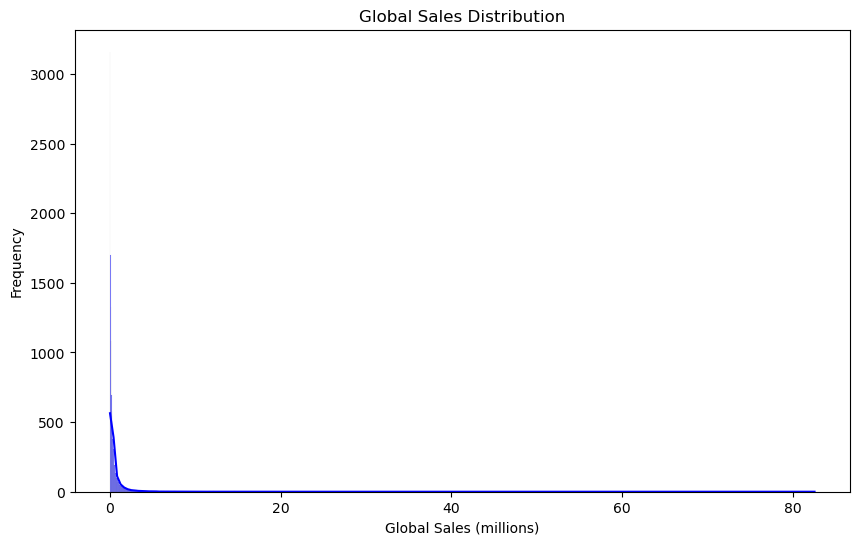

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], kde=True, color='blue')
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.show()


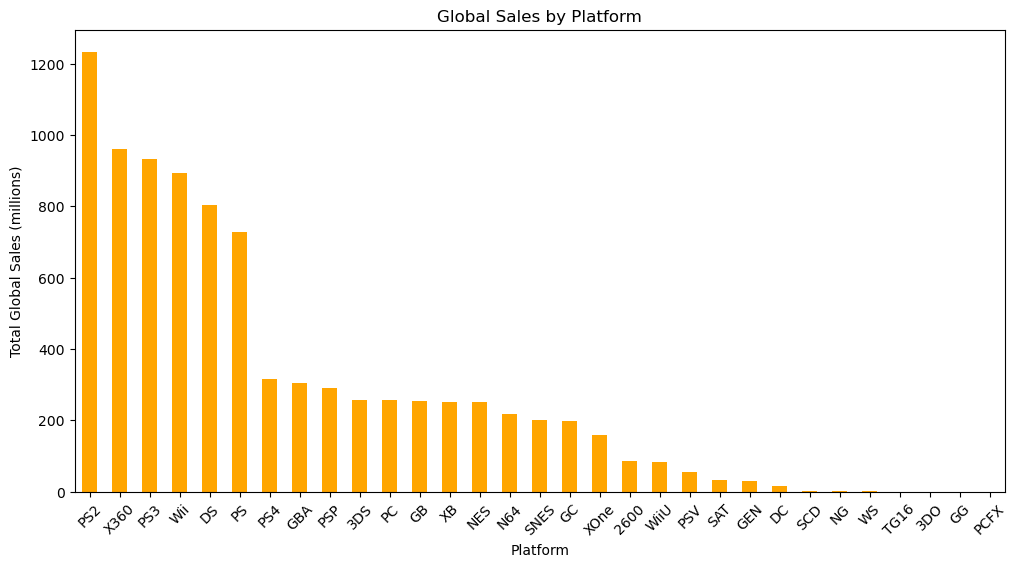

In [42]:
plt.figure(figsize=(12, 6))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', color='orange')
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()

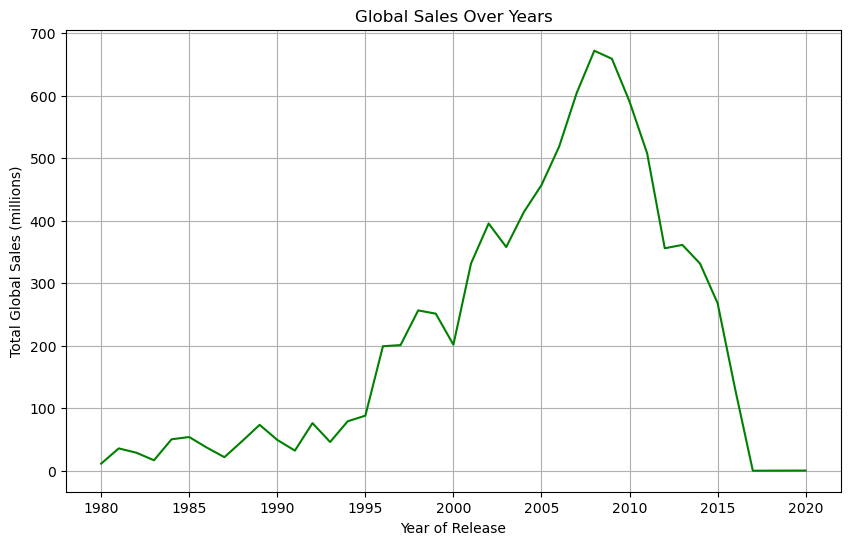

In [ ]:
plt.figure(figsize=(10, 6))
yearly_sales = df.groupby('Year_of_Release')['Global_Sales'].sum()
yearly_sales.plot(kind='line', color='green')
plt.title('Global Sales Over Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales (millions)')
plt.grid(True)
plt.show()

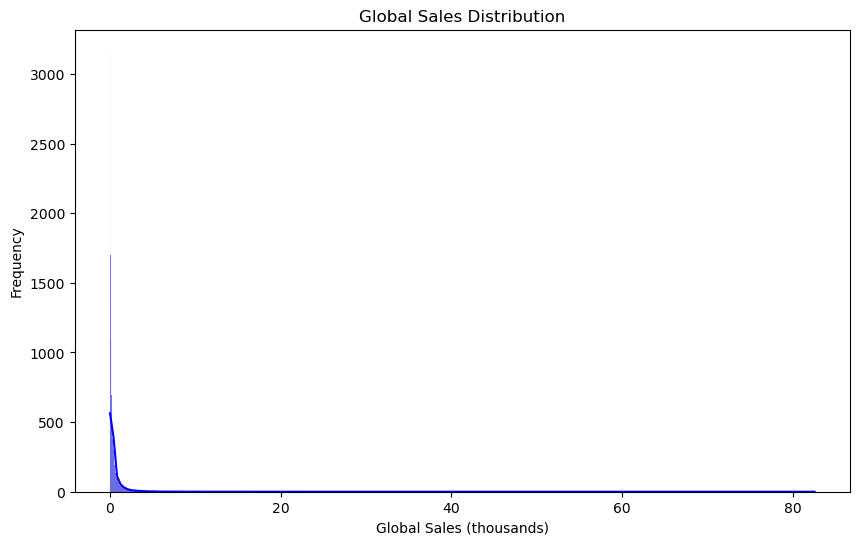

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], kde=True, color='blue')
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales (thousands)')
plt.ylabel('Frequency')
plt.show()


In [54]:
import pandas as pd

# 1. df_temp'ten sadece gerekli kolonları seçiyoruz
df_main = df_temp[['Name', 'Platform', 'Genre', 'Year_of_Release', 'Global_Sales']].copy()

# 2. Game_ID ekliyoruz (1'den başlayarak otomatik sayılar)
df_main.insert(0, 'Game_ID', range(1, 1 + len(df_main)))

# 3. Kontrol ediyoruz
print(df_main.head())

# 4. CSV dosyasına kaydediyoruz
df_main.to_csv('C:/Users/Monster/Desktop/Video Games/Datasets/video_game_sales_main.csv', index=False)

   Game_ID                      Name Platform         Genre  Year_of_Release  \
0        1                Wii Sports      Wii        Sports             2006   
1        2         Super Mario Bros.      NES      Platform             1985   
2        3            Mario Kart Wii      Wii        Racing             2008   
3        4         Wii Sports Resort      Wii        Sports             2009   
4        5  Pokemon Red/Pokemon Blue       GB  Role-Playing             1996   

   Global_Sales  
0         82.53  
1         40.24  
2         35.52  
3         32.77  
4         31.37  


In [56]:
# Platform bazında satışları gruplayalım
platform_sales = df_temp.groupby('Platform').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# ID ekleyelim (daha düzenli bir tablo olsun)
platform_sales['Platform_ID'] = platform_sales.index + 1

# Sütun sırasını değiştirelim
platform_sales = platform_sales[['Platform_ID', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# CSV dosyasına kaydedelim
platform_sales.to_csv('C:/Users/Monster/Desktop/Video Games/Datasets/video_game_sales_platform.csv', index=False)


In [ ]:
# Genre bazında satışları gruplayalım
genre_sales = df_temp.groupby('Genre').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

# ID ekleyelim (daha düzenli bir tablo olsun)
genre_sales['Genre_ID'] = genre_sales.index + 1

# Sütun sırasını değiştirelim
genre_sales = genre_sales[['Genre_ID', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# CSV dosyasına kaydedelim
genre_sales.to_csv('C:/Users/Monster/Desktop/Video Games/Datasets/video_game_sales_genre.csv', index=False)